<a href="https://colab.research.google.com/github/ReemFarah/ReemFarah.github.io/blob/main/CC8_Big_Data_Extracting_a_story_from_millions_of_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt


In [9]:
prices_df = pd.read_csv('https://eco-prices-scrapes.s3.eu-west-2.amazonaws.com/teaching/redacted_prices_df.csv')
items_df = pd.read_csv('https://eco-prices-scrapes.s3.eu-west-2.amazonaws.com/teaching/redacted_items_df.csv')


In [11]:
print(prices_df.head())
print(prices_df.info())
print(items_df.head())
print(items_df.info())

         date  price      unit_price  loyalty_price  original_price  store_id  \
0  2023-10-06  12.95  0.16 per 100ml            NaN             NaN         5   
1  2023-10-06   9.00      9 per 75cl            NaN             NaN         5   
2  2023-10-06   4.00   1.29 per 100g            NaN             NaN         5   
3  2023-10-06   2.50   1.67 per 100g           2.00             NaN         5   
4  2023-10-06   1.50   1.36 per 100g           1.35             NaN         5   

   product_id  
0    209870.0  
1    265800.0  
2    181052.0  
3    122275.0  
4    164794.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5484040 entries, 0 to 5484039
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   price           float64
 2   unit_price      object 
 3   loyalty_price   float64
 4   original_price  float64
 5   store_id        int64  
 6   product_id      float64
dtypes: float64(4), int64(1), object(2)
memo

In [13]:
# Merge datasets on product_id (or equivalent matching column)
merged_data = pd.merge(prices_df, items_df, on='product_id', how='inner')

# Preview the merged data
print(merged_data.head())


         date  price      unit_price  loyalty_price  original_price  \
0  2023-10-06  12.95  0.16 per 100ml            NaN             NaN   
1  2023-10-06  12.95  0.16 per 100ml            NaN             NaN   
2  2023-10-06   9.00      9 per 75cl            NaN             NaN   
3  2023-10-06   4.00   1.29 per 100g            NaN             NaN   
4  2023-10-06   4.00   1.29 per 100g            NaN             NaN   

   store_id_x  product_id  store_id_y    cpi_id  \
0           5    209870.0           5  212023.0   
1           5    209870.0           5  212025.0   
2           5    265800.0           5  310426.0   
3           5    181052.0           5  212228.0   
4           5    181052.0           5  212218.0   

                         cpi_name  
0   cola/fizzy drink 330ml pk 4-8  
1  cola drink, reg,bottle,1.25-2l  
2  sparkling wine 75cl min 11%abv  
3         malted chocolate sweets  
4   carton/box of chocs 150-400gm  


In [15]:
# Filter for a specific category (e.g., products containing "cola drink")
specific_category = merged_data[merged_data['cpi_name'].str.contains("cola drink", case=False, na=False)]

# Group data by date and calculate the average price for the category
category_price_trends = (
    specific_category.groupby('date')['price']
    .mean()
    .reset_index()
)

# Sort by date to ensure proper time series plotting
category_price_trends = category_price_trends.sort_values(by='date')



In [18]:
print(merged_data.columns)


Index(['date', 'price', 'unit_price', 'loyalty_price', 'original_price',
       'store_id_x', 'product_id', 'store_id_y', 'cpi_id', 'cpi_name'],
      dtype='object')


In [19]:
# Group data by store and calculate average prices
store_prices = (
    merged_data.groupby('store_id_y')['price']
    .mean()
    .reset_index()
)

# Sort by price for better visualization
store_prices = store_prices.sort_values(by='price', ascending=False)

# Display the resulting DataFrame to verify the output
print(store_prices)



   store_id_y     price
1           2  7.716530
2           3  5.225812
5           6  5.032094
4           5  4.833674
0           1  4.357184
6           7  3.687768
3           4  2.280244


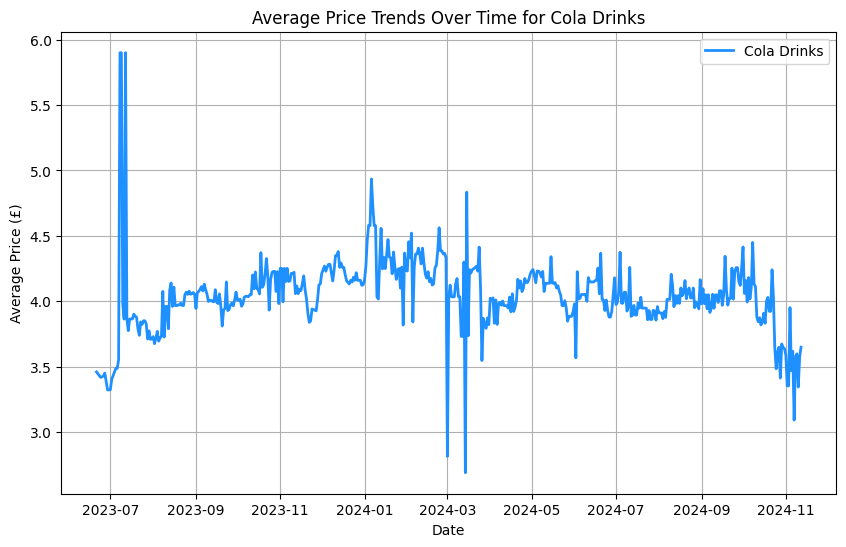

In [32]:
import matplotlib.pyplot as plt

# Time series plot for category-specific trends (e.g., "cola drink")
plt.figure(figsize=(10, 6))
plt.plot(category_price_trends['date'], category_price_trends['price'], label='Cola Drinks', color='dodgerblue', linewidth=2)
plt.title('Average Price Trends Over Time for Cola Drinks')
plt.xlabel('Date')
plt.ylabel('Average Price (£)')
plt.legend()
plt.grid()
plt.show()


This chart shows the average price trends for a specific product category (e.g., 'Dairy') over time. Aggregating daily prices highlights temporal price variations and seasonal effects, offering insights into market behavior and price fluctuations.

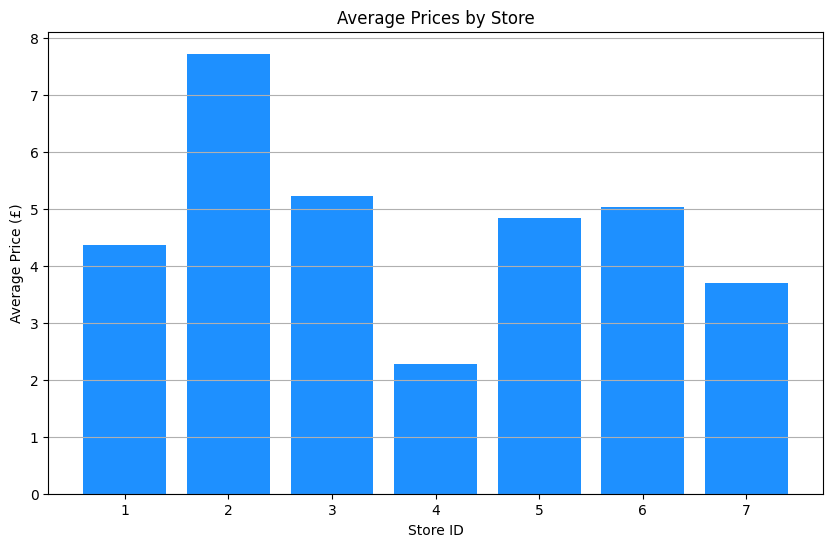

In [33]:
# Bar chart for average prices by store
plt.figure(figsize=(10, 6))
plt.bar(store_prices['store_id_y'], store_prices['price'], color='dodgerblue')
plt.title('Average Prices by Store')
plt.xlabel('Store ID')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


This bar chart compares the average prices of products across different stores. It emphasizes price disparities among retailers, aiding in identifying stores with consistently higher or lower pricing strategies.